# Experiment 28

GASP analysis of training with fat simulation data. 

Notes:
- Seems gasp works better with low tip angles for matching fat and muscle data.

In [1]:
import sys
sys.path.insert(0, '../../')  

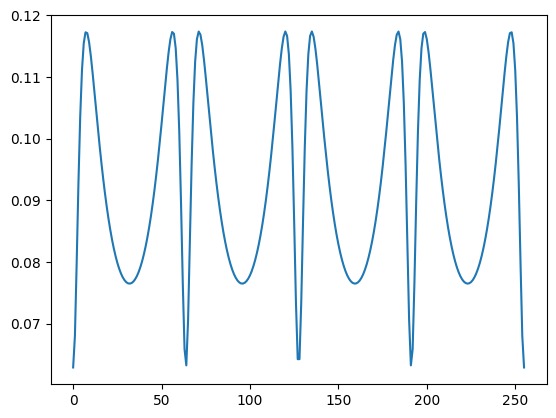

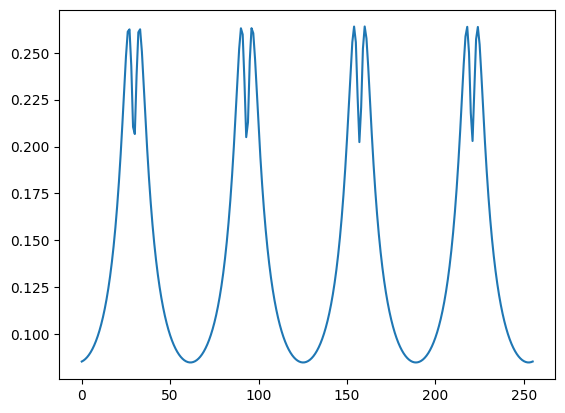

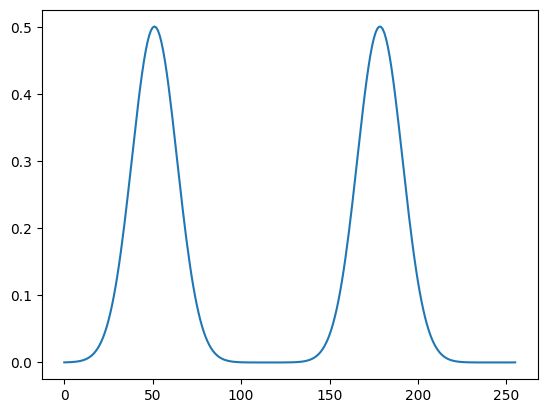

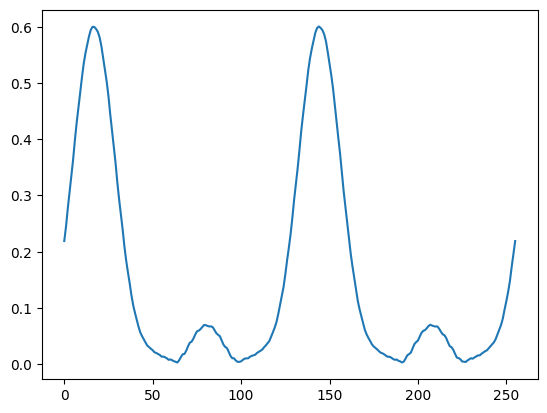

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, train_gasp, run_gasp, simulate_ssfp, responses

# Simulate ssfp with tissue phantom 0
minTR = 7.485e-3
M1 = simulate_ssfp(width = 256, height = 1, npcs = 16, TRs = [minTR, minTR*2, minTR*4], alpha = np.deg2rad(10), gradient = 4 * np.pi, phantom_type='line-muscle', phantom_padding=0)
M2 = simulate_ssfp(width = 256, height = 1, npcs = 16, TRs = [minTR, minTR*2, minTR*4], alpha = np.deg2rad(10), gradient = 4 * np.pi, phantom_type='line-fat', phantom_padding=0)

plt.plot(np.abs(M1[0, :, 0, 0, 0]).T)
plt.show()
plt.plot(np.abs(M2[0, :, 0, 0, 0]).T)
plt.show()

D1 = responses.gaussian(width=256, bw=0.2, shift=0.2)

# Train gasp model coefficients
Ic1, An1 = train_gasp(process_data_for_gasp(M1)[0], D1)

Ic2 = run_gasp(M2, An1)

# Plot results
plt.plot(np.abs(Ic1).T)
plt.show()
plt.plot(np.abs(Ic2).T)
plt.show()
